<a href="https://colab.research.google.com/github/esserilee/Innopolis/blob/main/%D0%BF%D1%80%D0%BE%D0%BC%D0%B5%D0%B6%D1%83%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   wage76  wage_binary
0     NaN            0
1  1.7011            1
2  1.5707            0
3  1.9755            1
4  0.9163            0


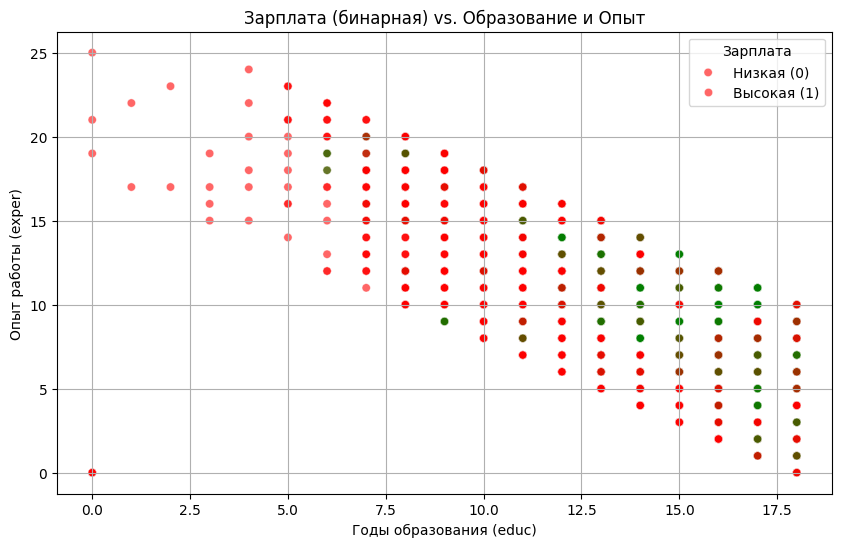

Accuracy: 0.7062
Recall: 0.7584


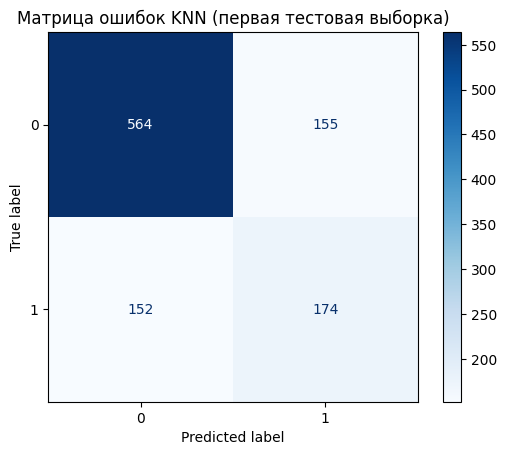

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


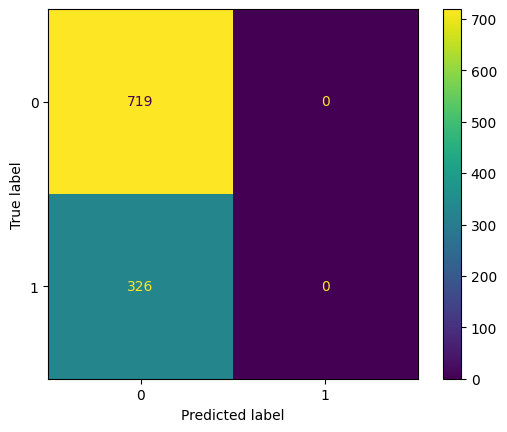

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6880382775119617
Precision: 0.0
Recall: 0.0
F1-score: 0.0
[[   1.4893126]
 [ 122.34598  ]
 [-110.88971  ]
 ...
 [  36.444866 ]
 [ 178.36827  ]
 [-110.88971  ]]
Accuracy: 0.5828
Recall: 0.7388


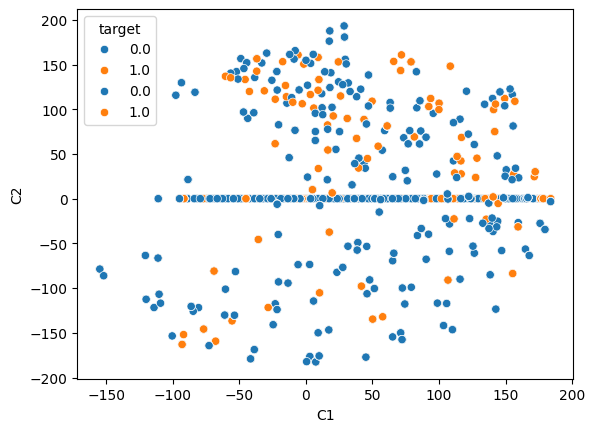

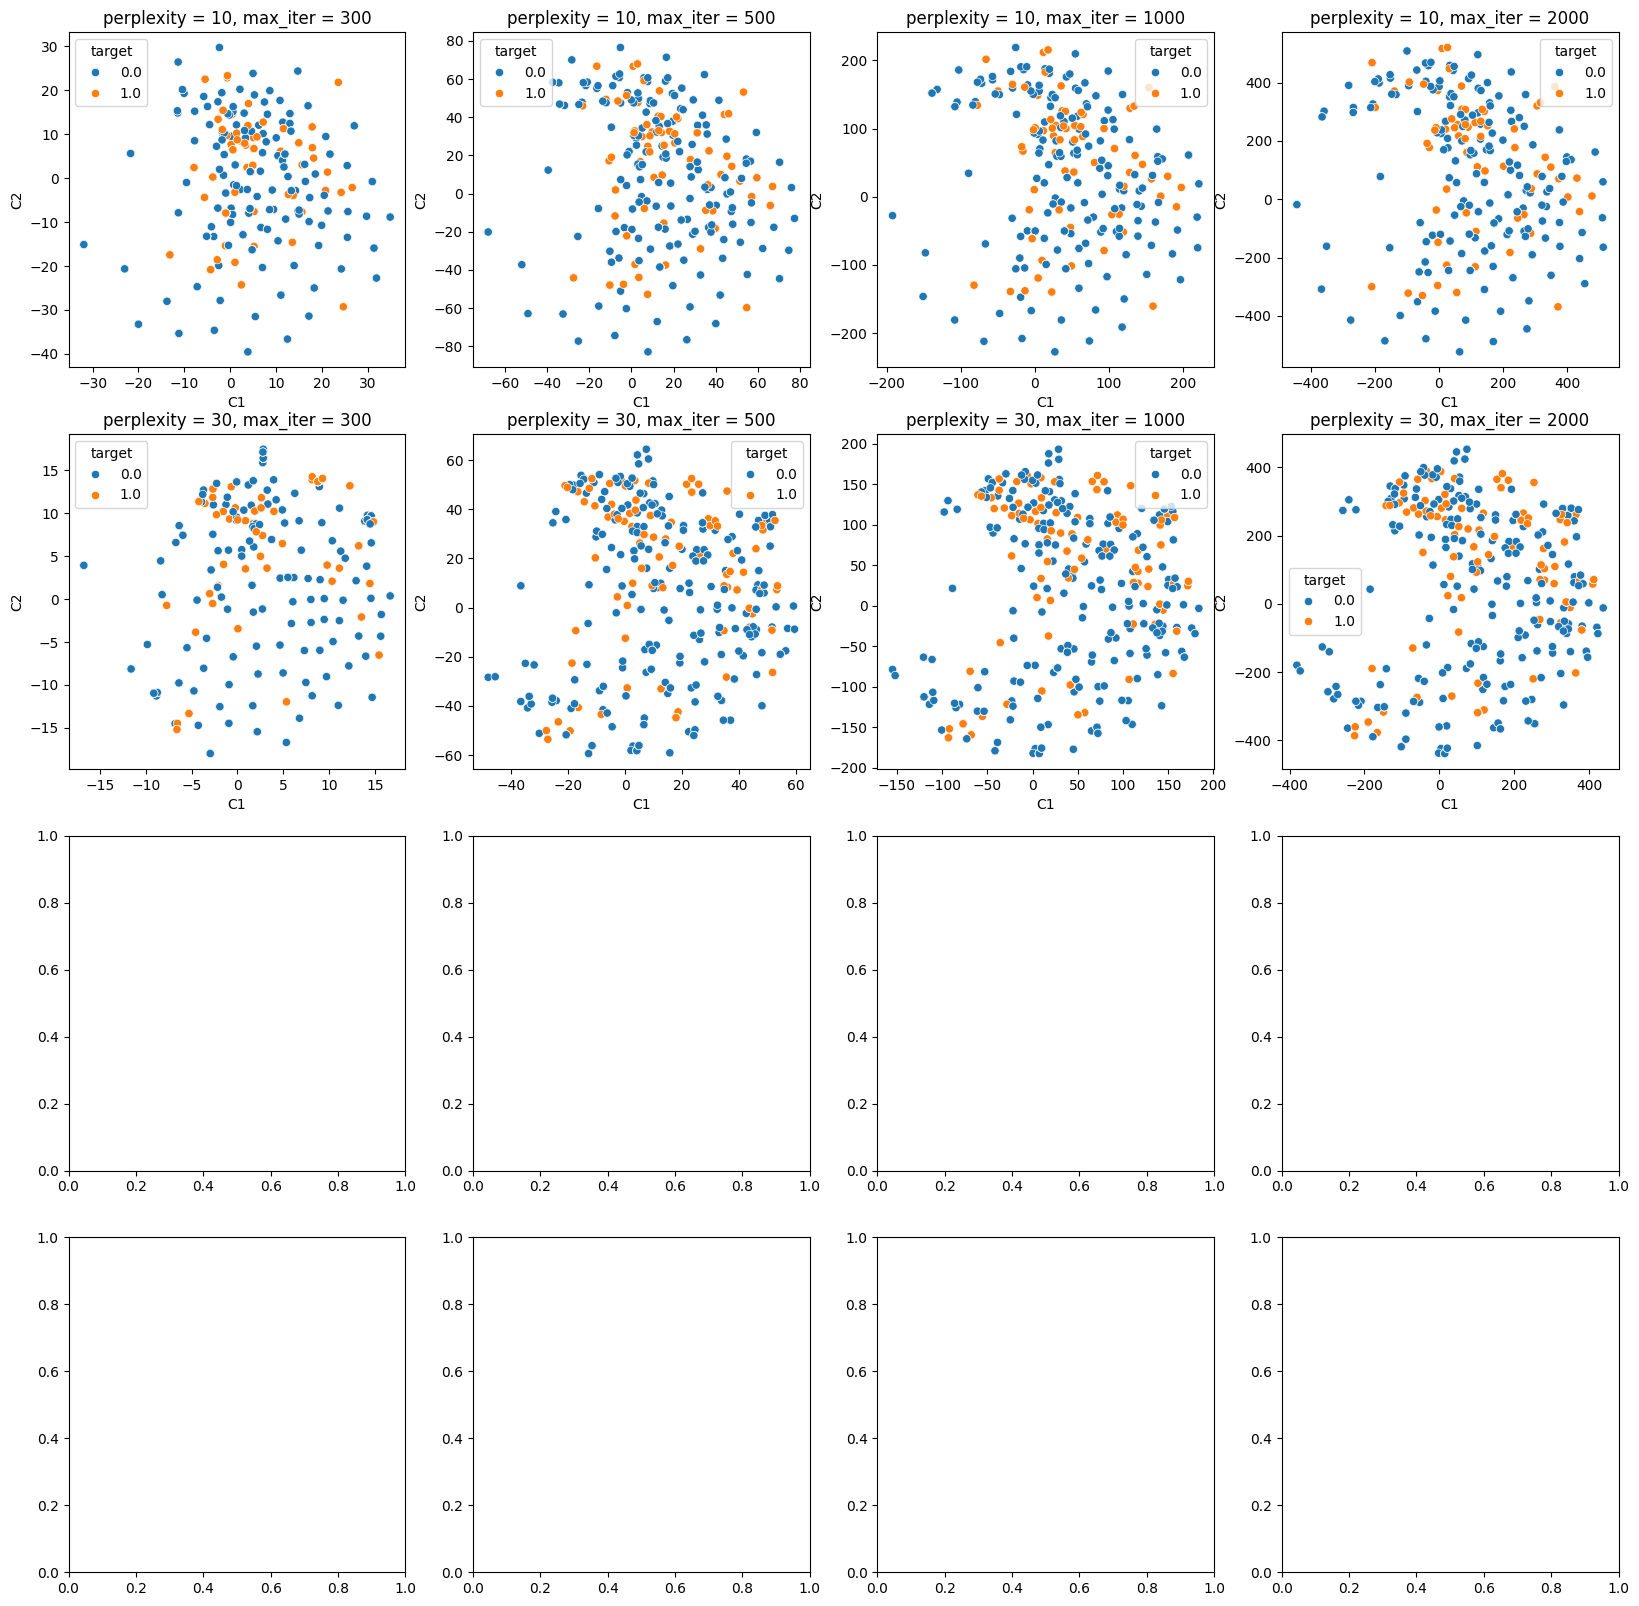

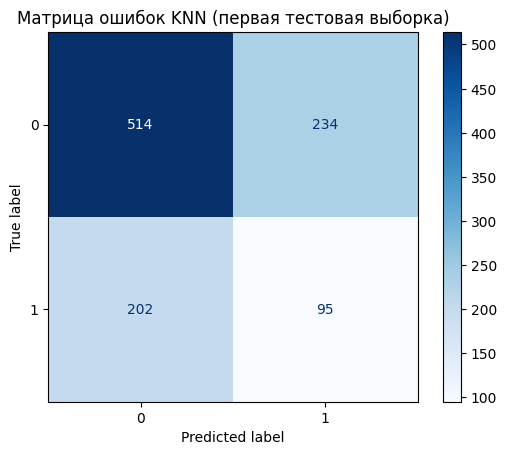

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           classification_report, roc_auc_score)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm

link = "https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/RetSchool.csv"
data1 = pd.read_csv(link)
#загружаем датасет

#датасет содержит в себе информацию о зп и других факторах, которые могут на нее влиять (начиная от здоровья, заканчивая жил с матерью только в 14), наиболее рационально будет взять переменную зп как бинарную и смотреть, как на нее влияет образование и стаж, плюс проверить, на сколько образование влияет на зпmedian_wage = data['wage76'].median()

#вычиляем, какое среднее значение зп и создаем бинарную переменную, которая выдает 1, если зп выше среднего и 0 если ниже

median_wage = data1['wage76'].median()  # Определяем median_wage перед использованием
data1['wage_binary'] = (data1['wage76'] > median_wage).astype(int)
print(data1[['wage76', 'wage_binary']].head())
cleaned_data1 = data1.dropna()
data = data1.fillna(0)

#строим график зависимости зп от образования и стажа
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='grade76', y='exp76', hue='wage_binary', palette={0: 'red', 1: 'green'}, alpha=0.6)
plt.title('Зарплата (бинарная) vs. Образование и Опыт')
plt.xlabel('Годы образования (educ)')
plt.ylabel('Опыт работы (exper)')
plt.legend(title='Зарплата', labels=['Низкая (0)', 'Высокая (1)'])
plt.grid(True)
plt.show()
#уже на графике можно заметить, что образование не сильно влияет на зп, как стаж
#наша задача: спрогнозировать, насколько высокая будет зарплата в зависимости от этих двух переменных

X = data[['grade76', 'exp76']]
y = data['wage_binary']

# 60% обучающая, 40% временная тестовая
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# 40% временной делим на 20% test_a и 20% test_b
X_test_a, X_test_b, y_test_a, y_test_b = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

# 4. Масштабирование
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_a_scaled = scaler.transform(X_test_a)
X_test_b_scaled = scaler.transform(X_test_b)

#KNN

knn = KNeighborsClassifier(n_neighbors=5)  # Используем 5 соседей
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_a_scaled)
y_proba = knn.predict_proba(X_test_a_scaled)[:, 1]
print(f"Accuracy: {accuracy_score(y_test_a, y_pred):.4f}")
print(f"Recall: {roc_auc_score(y_test_a, y_proba):.4f}")

cm = confusion_matrix(y_test_a, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Матрица ошибок KNN (первая тестовая выборка)')
plt.show()
#показатели хорошие, по матрице ошибок видно, что положительные исходы модель угадывает хорошо

#Decision Tree
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
pipe = make_pipeline(StandardScaler(), PCA(n_components = 2), DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 42))
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test_a_scaled)

cm = confusion_matrix(y_test_a, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipe.classes_)
disp.plot()
plt.show()

print('Accuracy:', accuracy_score(y_test_a, y_pred))
print('Precision:', precision_score(y_test_a, y_pred))
print('Recall:', recall_score(y_test_a, y_pred))
print('F1-score:', f1_score(y_test_a, y_pred))

#данная модель угадывает все позитивные исходы, но вот негативные не угадывает вообще

#tSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 1, random_state = 42)
X_tsne = tsne.fit_transform(X_train_scaled)
print(X_tsne)

tsne_df = pd.DataFrame(X_tsne, columns = ['C1'])
tsne_df['target'] = y_train
sns.scatterplot(data = tsne_df, x = 'C1', y = 0, hue = 'target')

#Пробуем спроецировать на 1D пространство

tsne = TSNE(n_components = 2, random_state = 42)
X_tsne = tsne.fit_transform(X_train_scaled)

tsne_df = pd.DataFrame(X_tsne, columns = ['C1', 'C2'])
tsne_df['target'] = y_train

sns.scatterplot(data = tsne_df, x = 'C1', y = 'C2', hue = 'target')

#меняем количество операций

fig, ax = plt.subplots(4, 4, figsize = (20, 20))
r = 0
for perplexity in [10, 30]:
  c = 0
  for max_iter in [300, 500, 1000, 2000]:
    tsne = TSNE(n_components = 2, random_state = 42, perplexity = perplexity, max_iter = max_iter)
    X_tsne = tsne.fit_transform(X_train_scaled)

    tsne_df = pd.DataFrame(X_tsne, columns = ['C1', 'C2'])
    tsne_df['target'] = y_train
    sns.scatterplot(data = tsne_df, x = 'C1', y = 'C2', hue = 'target', ax = ax[r, c])
    ax[r,c].set_title(f'perplexity = {perplexity}, max_iter = {max_iter}')
    c += 1
  r += 1
#разделяет не так явно, как хотелось бы
#в итоге самый удачный вариант модели KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Используем 5 соседей
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_a_scaled)
y_proba = knn.predict_proba(X_test_b_scaled)[:, 1]
print(f"Accuracy: {accuracy_score(y_test_b, y_pred):.4f}")
print(f"Recall: {roc_auc_score(y_test_b, y_proba):.4f}")

cm = confusion_matrix(y_test_b, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Матрица ошибок KNN (первая тестовая выборка)')
plt.show()

#рекоменадции для пользователей: оценивать оба параметра (стаж и образование), но на основе графика можно заметить, что стаж работы имеет бОльшую ценность, чем образование